#Importing the neccessary library

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations
import networkx as nx
import random
import math
from prettytable import PrettyTable
import time
import seaborn as sns
import tracemalloc

#Preparing the datasets for the algorithms

In [ ]:
# Function to parse a TSP file and extract coordinates of cities.
def parse_tsp_file(file_path, num_rows=20):
    coordinates = {}
    with open(file_path, 'r') as f:
        lines = f.readlines()
        is_node_coord_section = False

        for line in lines:
            line = line.strip()
            if line.startswith("NODE_COORD_SECTION"):
                is_node_coord_section = True
                continue
            if is_node_coord_section:
                if line == "EOF" or len(coordinates) >= num_rows:
                    break
                parts = line.split()
                index = int(parts[0])
                x, y = float(parts[1]), float(parts[2])
                coordinates[index] = (x, y)
    return coordinates

# Function to compute the distance matrix from coordinates.
def compute_distance_matrix(coordinates):
    n_points = len(coordinates)
    distance_matrix = np.zeros((n_points, n_points))

    # Calculate Euclidean distance between every pair of cities
    for i in range(n_points):
        for j in range(n_points):
            if i != j:
                x1, y1 = coordinates[i + 1]
                x2, y2 = coordinates[j + 1]
                distance_matrix[i][j] = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)

    # Round the distance matrix to 2 significant figures
    distance_matrix = np.round(distance_matrix, decimals=2)

    return distance_matrix

# Plotting the TSP path
def plot_tsp_path(coordinates, path, distance_matrix):
    x = [coordinates[node + 1][0] for node in path]
    y = [coordinates[node + 1][1] for node in path]

    plt.figure(figsize=(10, 6))
    plt.plot(x, y, 'o-', markersize=5)
    for i, (xi, yi) in enumerate(zip(x, y)):
        plt.text(xi, yi, str(path[i]), fontsize=12, ha='right')

    # Annotate distances
    for i in range(len(path) - 1):
        start = path[i]
        end = path[i + 1]
        distance = distance_matrix[start][end]
        mid_x = (coordinates[start + 1][0] + coordinates[end + 1][0]) / 2
        mid_y = (coordinates[start + 1][1] + coordinates[end + 1][1]) / 2
        plt.text(mid_x, mid_y, f'{distance:.2f}', fontsize=10, ha='center', color='red')

    plt.title("TSP Path with Distances")
    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")
    plt.grid()
    plt.show()

#Dynamic Programming

Enter the number of cities to visualize (up to 131): 10
Execution time: 0.03 seconds
Minimum cost: 81.88
Path: [0, 1, 2, 3, 9, 8, 7, 6, 5, 4, 0]


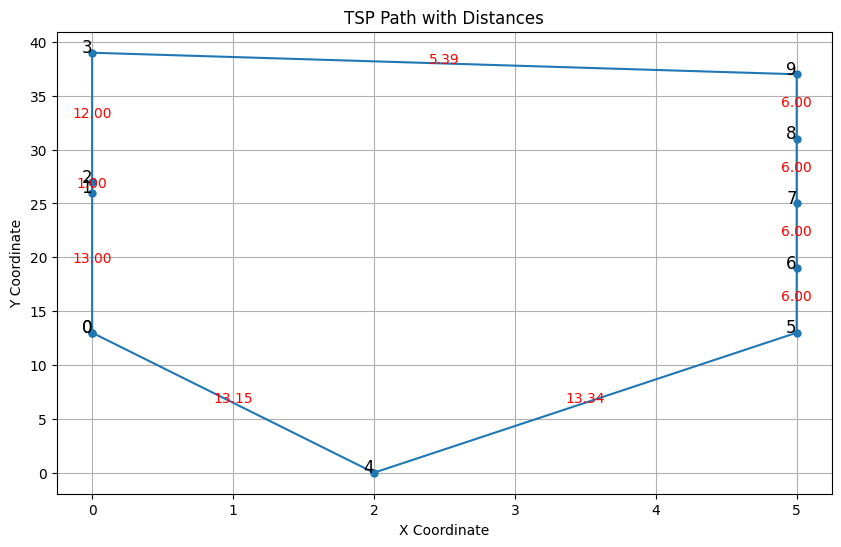

In [ ]:
# Dynamic Programming algorithm for TSP
def tsp_dynamic_programming(distance_matrix):
    n = distance_matrix.shape[0]
    memo = {}
    parent = {}


    def visit(city, visited):
        if visited == (1 << n) - 1:
            return distance_matrix[city][0]

        if (city, visited) in memo:
            return memo[(city, visited)]

        min_cost = float('inf')
        min_parent = -1
        for next_city in range(n):
            if visited & (1 << next_city) == 0:
                cost = distance_matrix[city][next_city] + visit(next_city, visited | (1 << next_city))
                if cost < min_cost:
                    min_cost = cost
                    min_parent = next_city

        memo[(city, visited)] = min_cost
        parent[(city, visited)] = min_parent
        return min_cost

    min_cost = visit(0, 1)

    # Reconstruct the path
    path = []
    visited = 1
    current_city = 0
    while True:
        path.append(current_city)
        next_city = parent.get((current_city, visited))
        if next_city is None:
            break
        visited |= 1 << next_city
        current_city = next_city

    path.append(0)  # return to the starting city
    return min_cost, path

# Specify the number of rows to read
num_rows = int(input("Enter the number of cities to visualize (up to 131): "))


file_path = 'xqf131.tsp'
coordinates = parse_tsp_file(file_path, num_rows=num_rows)
dist_matrix = compute_distance_matrix(coordinates)

start = time.time()

# Solve the TSP problem
min_cost, path = tsp_dynamic_programming(dist_matrix)

end = time.time()
print(f"Execution time: {end - start:.2f} seconds")

# Print the results
print("Minimum cost:", min_cost)
print("Path:", path)

# Plot the TSP path with distances
plot_tsp_path(coordinates, path, dist_matrix)

Testing Dynamic Programming with a range of cities to see the Time Complexity

Number of cities: 5, Execution time: 0.00 seconds, Minimum cost: 78.19999999999999
Number of cities: 6, Execution time: 0.00 seconds, Minimum cost: 78.97
Number of cities: 7, Execution time: 0.00 seconds, Minimum cost: 79.11
Number of cities: 8, Execution time: 0.00 seconds, Minimum cost: 79.36
Number of cities: 9, Execution time: 0.01 seconds, Minimum cost: 79.92
Number of cities: 10, Execution time: 0.03 seconds, Minimum cost: 81.88
Number of cities: 11, Execution time: 0.06 seconds, Minimum cost: 88.89
Number of cities: 12, Execution time: 0.15 seconds, Minimum cost: 89.09
Number of cities: 13, Execution time: 0.46 seconds, Minimum cost: 95.09
Number of cities: 14, Execution time: 0.62 seconds, Minimum cost: 99.06
Number of cities: 15, Execution time: 1.15 seconds, Minimum cost: 100.21000000000001
Number of cities: 16, Execution time: 2.66 seconds, Minimum cost: 101.44999999999999
Number of cities: 17, Execution time: 6.39 seconds, Minimum cost: 102.78
Number of cities: 18, Executio

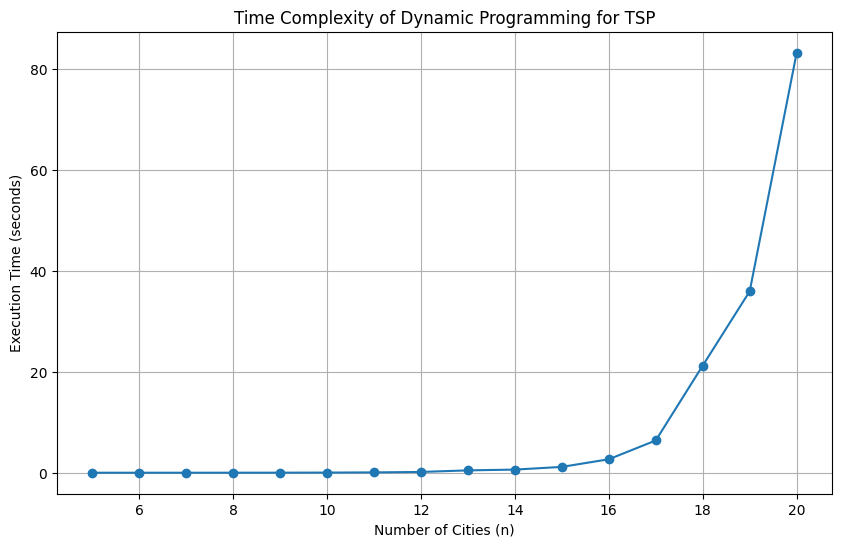

In [ ]:
# Define the range of cities to test
city_counts = list(range(5, 21))  # You can adjust the range as needed
execution_times = []

for num_cities in city_counts:
    coordinates = parse_tsp_file(file_path, num_rows=num_cities)
    dist_matrix = compute_distance_matrix(coordinates)

    start = time.time()
    min_cost, path = tsp_dynamic_programming(dist_matrix)
    end = time.time()

    execution_time = end - start
    execution_times.append(execution_time)
    print(f"Number of cities: {num_cities}, Execution time: {execution_time:.2f} seconds, Minimum cost: {min_cost}")

# Plot the time complexity
plt.figure(figsize=(10, 6))
plt.plot(city_counts, execution_times, marker='o')
plt.xlabel('Number of Cities (n)')
plt.ylabel('Execution Time (seconds)')
plt.title('Time Complexity of Dynamic Programming for TSP')
plt.grid(True)
plt.show()

#Reinforcement Learning (Q-Learning)

In [ ]:
#Computes the total distance of a given route.
def route_distance(route: np.ndarray, distances: np.ndarray) -> float:
    total_distance  = 0
    for i in range(1, len(route)):
        total_distance  += distances[int(route[i - 1]), int(route[i])]
    total_distance  += distances[int(route[-1]), int(route[0])]
    return total_distance

#Finds the index of the maximum value in a row of the Q-table, considering only unmasked columns.
def custom_argmax(Q_table: np.ndarray, row: int, mask: np.ndarray) -> tuple:
    argmax = 0
    max_v = -np.inf
    idx = np.arange(Q_table.shape[1])
    np.random.shuffle(idx)
    for i in idx:
        if not mask[i]:
            continue
        if Q_table[row, i] > max_v:
            argmax = i
            max_v = Q_table[row, i]
    return argmax, max_v

#Computes a route using a greedy strategy based on Q-values.
def compute_greedy_route(Q_table: np.ndarray) -> np.ndarray:
    N = Q_table.shape[0]
    mask = np.array([True] * N)
    route = np.zeros((N,), dtype=int)
    mask[0] = False
    route[0] = 0  # Start at city 0
    for i in range(1, N):
        current = route[i - 1]
        next_visit, _ = custom_argmax(Q_table, int(current), mask)
        mask[next_visit] = False
        route[i] = next_visit
    return route

#Computes the total distance of the route derived from the Q-table.
def compute_value_of_q_table(Q_table: np.ndarray, distances: np.ndarray) -> float:
    greedy_route = compute_greedy_route(Q_table)
    return route_distance(greedy_route, distances)

#Plots and saves the progress of tour distances over epochs.
def trace_progress(values: list, true_best: float, tag: str):
    plt.figure(figsize=(19, 7))
    plt.plot(values, label="Tour distance")
    plt.hlines(true_best, xmin=0, xmax=len(values), color="r", label="True best")
    plt.xlabel("Number of Epochs")  # Label for the x-axis
    plt.ylabel("Tour Distance (Cost)")  # Label for the y-axis
    plt.title(tag)
    plt.legend()
    plt.show()

#Updates the Q-table using the epsilon-greedy strategy.
def eps_greedy_update(
    Q_table: np.ndarray,
    distances: np.ndarray,
    mask: np.ndarray,
    route: np.ndarray,
    epsilon: float,
    gamma: float,
    lr: float,
    N: int,
):
    mask[0] = False #Starting city is fixed
    next_visit = 0
    reward = 0
    for i in range(1, N):
        # Iteration i : choosing ith city to visit
        possible = np.where(mask == True)[0]
        current = route[i - 1]
        if len(possible) == 1:
            next_visit = possible[0]
            reward = -distances[int(current), int(next_visit)]
            # Reward for finishing the route
            max_next = -distances[int(next_visit), int(route[0])]
        else:
            u = np.random.random()
            if u < epsilon:
                # random choice amongst possible
                next_visit = np.random.choice(possible)
            else:
                next_visit, _ = custom_argmax(Q_table, int(current), mask)
            # update mask and route
            mask[next_visit] = False
            route[i] = next_visit
            reward = -distances[int(current), int(next_visit)]
            # Get max Q from new state
            _, max_next = custom_argmax(Q_table, int(next_visit), mask)
        # updating Q
        Q_table[int(current), int(next_visit)] = Q_table[
            int(current), int(next_visit)
        ] + lr * (reward + gamma * max_next - Q_table[int(current), int(next_visit)])
    return Q_table

#Executes Q-learning with epsilon-greedy strategy to solve the TSP.
def QLearning(
    Q_table: np.ndarray,
    distances: np.ndarray,
    initial_epsilon: float,
    final_epsilon: float,
    epsilon_decay: float,  # This is the amount by which epsilon decreases per epoch
    gamma: float,
    lr: float,
    epochs: int,
    max_no_improve_episodes: int,
):
    N = Q_table.shape[0]
    CompQ_table = Q_table.copy()
    mask = np.array([True] * N)
    route = np.zeros((N,))
    cache_distance_best = np.zeros((epochs,))
    cache_distance_comp = np.zeros((epochs,))
    best_cost = float('inf')
    no_improve_count = 0

    # Initialize epsilon
    epsilon = initial_epsilon

    for ep in range(epochs):
        CompQ_table = eps_greedy_update(
            CompQ_table, distances, mask, route, epsilon, gamma, lr, N
        )
        greedy_cost = compute_value_of_q_table(Q_table, distances)
        greedy_cost_comp = compute_value_of_q_table(CompQ_table, distances)
        cache_distance_best[ep] = greedy_cost
        cache_distance_comp[ep] = greedy_cost_comp

        if greedy_cost_comp < greedy_cost:
            Q_table[:, :] = CompQ_table[:, :]
            best_cost = greedy_cost_comp
            no_improve_count = 0
        else:
            no_improve_count += 1

        # Linear decay
        epsilon = max(final_epsilon, initial_epsilon - epsilon_decay * ep)

        #Stopping Criteria
        if no_improve_count >= max_no_improve_episodes:
            print(f"Stopping early after {ep+1} epochs due to no improvement.")
            cache_distance_best = cache_distance_best[:ep+1]
            cache_distance_comp = cache_distance_comp[:ep+1]
            break

        # Reset mask and route for the next episode
        route[:] = 0
        mask[:] = True

    return Q_table, cache_distance_best, cache_distance_comp

#Plots a heatmap of the Q-table with values displayed in each cell.
def plot_q_table_heatmap(Q_table: np.ndarray, title: str = "Q-Table Heatmap"):
    plt.figure(figsize=(10, 8))
    heatmap = plt.imshow(Q_table, cmap='viridis', aspect='auto')
    plt.colorbar(heatmap, label='Q-value')
    plt.title(title)
    plt.xlabel('Actions (Next City)')
    plt.ylabel('States (Current City)')

    # Loop over data dimensions and create text annotations.
    for i in range(Q_table.shape[0]):
        for j in range(Q_table.shape[1]):
            value = Q_table[i, j]
            plt.text(j, i, f'{value:.2f}', ha='center', va='center', color='white' if value < Q_table.max() / 2 else 'black')

    plt.show()

Enter the number of cities to visualize (up to 131): 10
Stopping early after 16872 epochs due to no improvement.
Execution time: 8.71 seconds


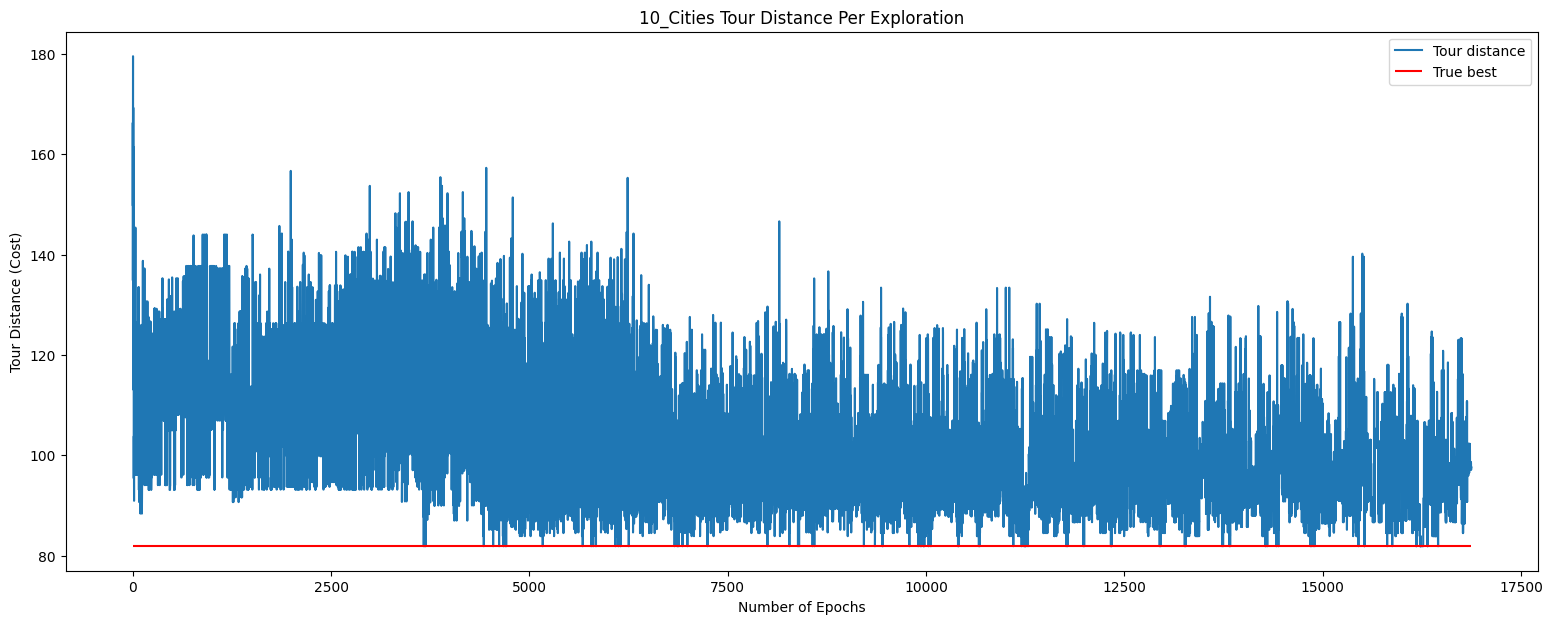

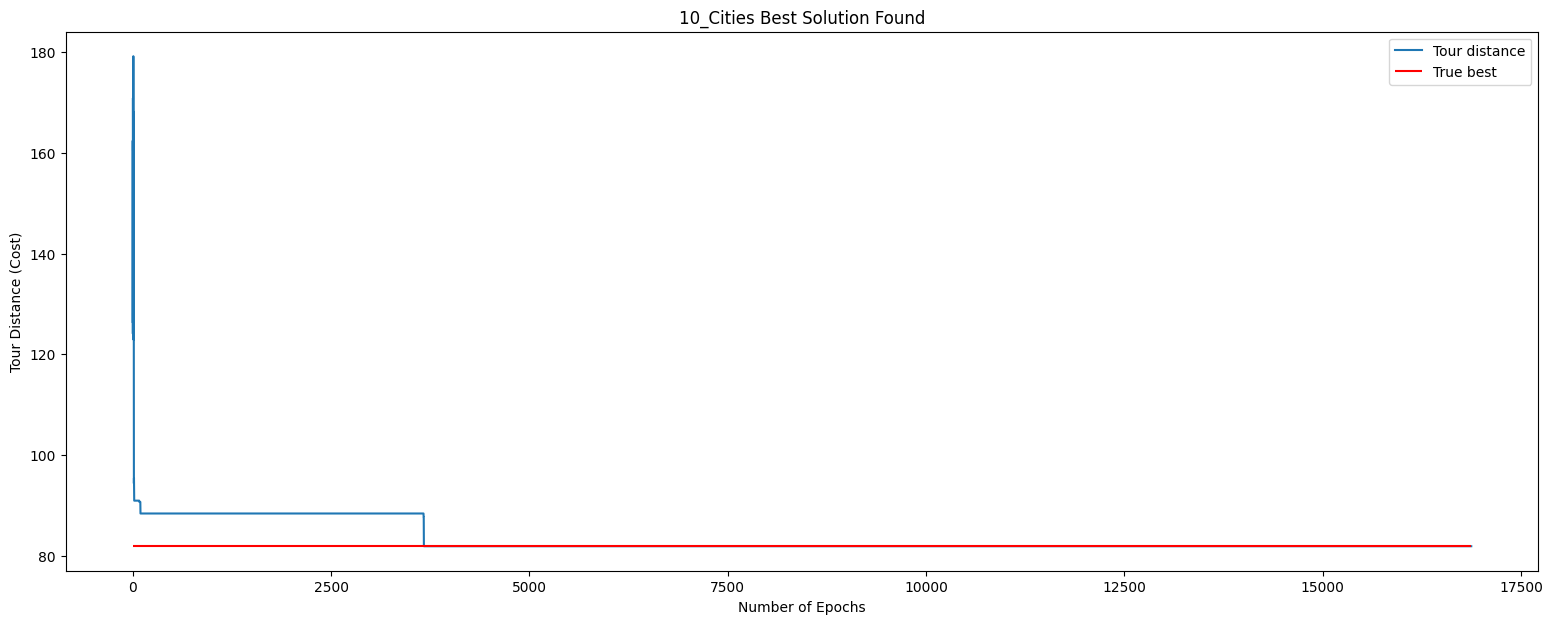

Number of cities: 10
Optimal path: [0 4 5 6 7 8 9 3 2 1]
Cost of the optimal path: 81.88
True best known cost: 81.88


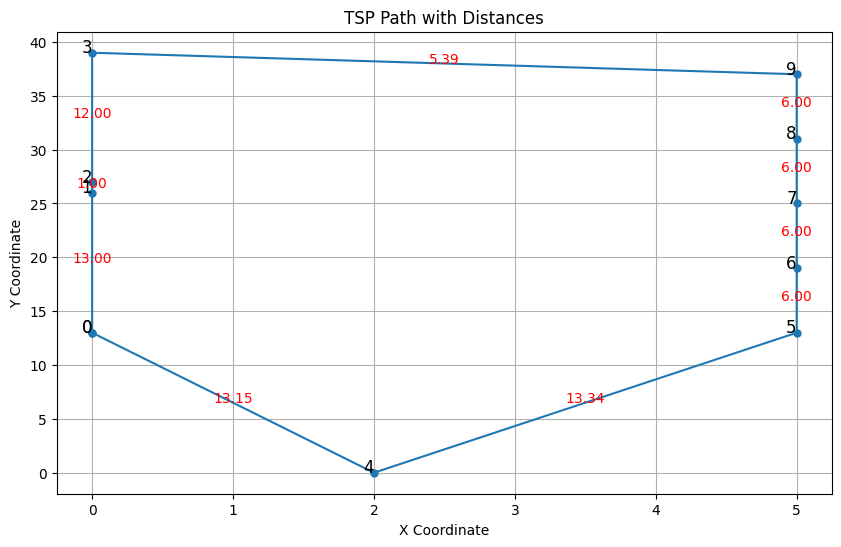

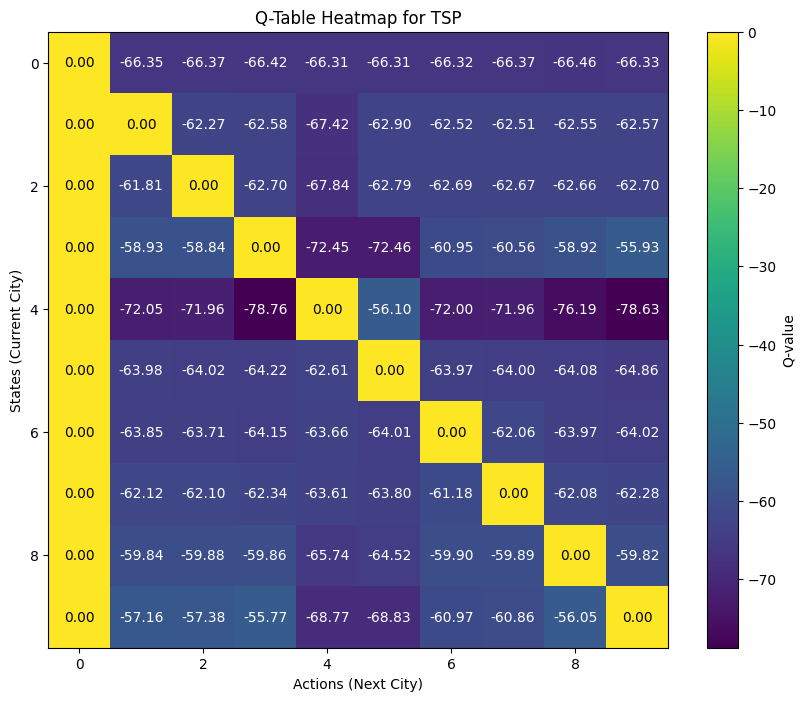

In [ ]:
#Example usage
file_path = 'xqf131.tsp'
num_rows = int(input("Enter the number of cities to visualize (up to 131): "))

coordinates = parse_tsp_file(file_path, num_rows=num_rows)
dist_matrix = compute_distance_matrix(coordinates)

start = time.time()

EPOCHS = 500000
LEARNING_RATE = 0.01
GAMMA = 0.99
INITIAL_EPSILON = 0.7  # Initial epsilon value
FINAL_EPSILON = 0.1    # Final epsilon value (higher means more exploration later)
EPSILON_DECAY = 0.0001   # Decay rate for epsilon
MAX_NO_IMPROVE_EPISODES = 10000

true_best = 81.88  # Replace with a specific value if available, or set to None

# Initialize Q-table
Q_table = np.zeros((num_rows, num_rows))

# Start Q-learning
start = time.time()
Q_table, cache_distance_best, cache_distance_comp = QLearning(
    Q_table,
    dist_matrix,
    initial_epsilon=INITIAL_EPSILON,
    final_epsilon=FINAL_EPSILON,
    epsilon_decay=EPSILON_DECAY,
    gamma=GAMMA,
    lr=LEARNING_RATE,
    epochs=EPOCHS,
    max_no_improve_episodes=MAX_NO_IMPROVE_EPISODES
)
end = time.time()
print(f"Execution time: {end - start:.2f} seconds")

# Plot and display the progress
trace_progress(
    cache_distance_comp,
    true_best,
    f"{num_rows}_Cities Tour Distance Per Exploration",
)
trace_progress(
    cache_distance_best,
    true_best,
    f"{num_rows}_Cities Best Solution Found",
)

# Compute and display the greedy route
greedy_route = compute_greedy_route(Q_table)
greedy_cost = route_distance(greedy_route, dist_matrix)

# Print the optimal path and cost
print(f"Number of cities: {num_rows}")
print(f"Optimal path: {greedy_route}")
print(f"Cost of the optimal path: {greedy_cost}")
print(f"True best known cost: {true_best}")

# Prepare the path for plotting (including returning to the starting city)
path = greedy_route.tolist()
path.append(0)

# Plot the TSP path
plot_tsp_path(coordinates, path, dist_matrix)

#Plot the Q-Table Heatmap
plot_q_table_heatmap(Q_table, title="Q-Table Heatmap for TSP")

Testing Q-Learning with a range of cities to see the Time Complexity

Stopping early after 10014 epochs due to no improvement.
Number of cities: 5, Execution time: 1.85 seconds, Minimum cost: 78.2
Stopping early after 16125 epochs due to no improvement.
Number of cities: 6, Execution time: 3.78 seconds, Minimum cost: 78.97
Stopping early after 13163 epochs due to no improvement.
Number of cities: 7, Execution time: 4.78 seconds, Minimum cost: 79.11000000000001
Stopping early after 13343 epochs due to no improvement.
Number of cities: 8, Execution time: 4.58 seconds, Minimum cost: 79.36
Stopping early after 13812 epochs due to no improvement.
Number of cities: 9, Execution time: 5.43 seconds, Minimum cost: 79.92
Stopping early after 16865 epochs due to no improvement.
Number of cities: 10, Execution time: 9.09 seconds, Minimum cost: 81.88
Stopping early after 15770 epochs due to no improvement.
Number of cities: 11, Execution time: 9.86 seconds, Minimum cost: 88.89
Stopping early after 15873 epochs due to no improvement.
Number of cities: 12, Execution ti

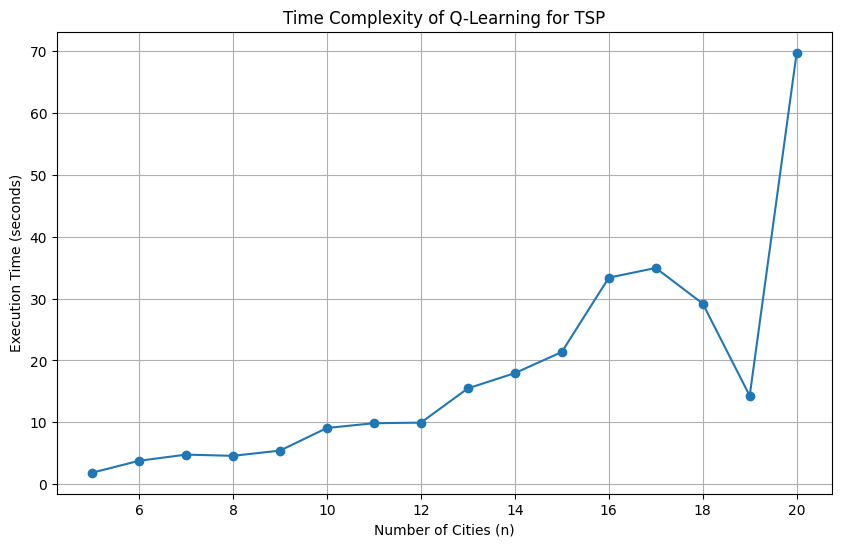

In [ ]:
# Define the range of cities to test
city_counts = list(range(5, 21))  # Adjust the range as needed
execution_times = []

file_path = 'xqf131.tsp'

EPOCHS = 500000
LEARNING_RATE = 0.01
GAMMA = 0.99
INITIAL_EPSILON = 0.7  # Initial epsilon value
FINAL_EPSILON = 0.1    # Final epsilon value (higher means more exploration later)
EPSILON_DECAY = 0.0001   # Decay rate for epsilon
MAX_NO_IMPROVE_EPISODES = 10000

for num_cities in city_counts:
    # Parse coordinates and compute distance matrix for the given number of cities
    coordinates = parse_tsp_file(file_path, num_rows=num_cities)
    dist_matrix = compute_distance_matrix(coordinates)

    # Initialize Q-table
    Q_table = np.zeros((num_cities, num_cities))

    # Measure execution time for Q-learning
    start = time.time()
    Q_table, cache_distance_best, cache_distance_comp = QLearning(
    Q_table,
    dist_matrix,
    initial_epsilon=INITIAL_EPSILON,
    final_epsilon=FINAL_EPSILON,
    epsilon_decay=EPSILON_DECAY,
    gamma=GAMMA,
    lr=LEARNING_RATE,
    epochs=EPOCHS,
    max_no_improve_episodes=MAX_NO_IMPROVE_EPISODES
    )
    end = time.time()

    # Record the execution time
    execution_time = end - start
    execution_times.append(execution_time)
    min_cost = compute_value_of_q_table(Q_table, dist_matrix)
    print(f"Number of cities: {num_cities}, Execution time: {execution_time:.2f} seconds, Minimum cost: {min_cost}")

# Plot the time complexity
plt.figure(figsize=(10, 6))
plt.plot(city_counts, execution_times, marker='o')
plt.xlabel('Number of Cities (n)')
plt.ylabel('Execution Time (seconds)')
plt.title('Time Complexity of Q-Learning for TSP')
plt.grid(True)
plt.show()

Comparision for Time Complexity and Minimum Cost

Stopping early after 10006 epochs due to no improvement.
Number of cities: 5
  Dynamic Programming: Execution time: 0.00 seconds, Minimum cost: 78.20
  Q-Learning: Execution time: 1.90 seconds, Minimum cost: 78.20
Stopping early after 10008 epochs due to no improvement.
Number of cities: 6
  Dynamic Programming: Execution time: 0.00 seconds, Minimum cost: 78.97
  Q-Learning: Execution time: 2.29 seconds, Minimum cost: 78.97
Stopping early after 13267 epochs due to no improvement.
Number of cities: 7
  Dynamic Programming: Execution time: 0.00 seconds, Minimum cost: 79.11
  Q-Learning: Execution time: 4.76 seconds, Minimum cost: 79.11
Stopping early after 13532 epochs due to no improvement.
Number of cities: 8
  Dynamic Programming: Execution time: 0.00 seconds, Minimum cost: 79.36
  Q-Learning: Execution time: 4.96 seconds, Minimum cost: 79.36
Stopping early after 13280 epochs due to no improvement.
Number of cities: 9
  Dynamic Programming: Execution time: 0.01 seconds, Minimum cost: 

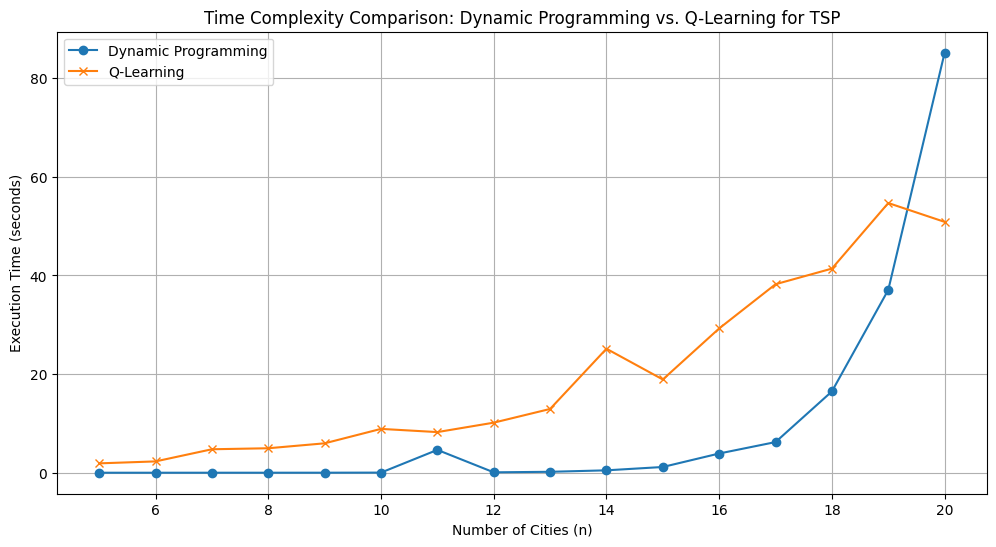

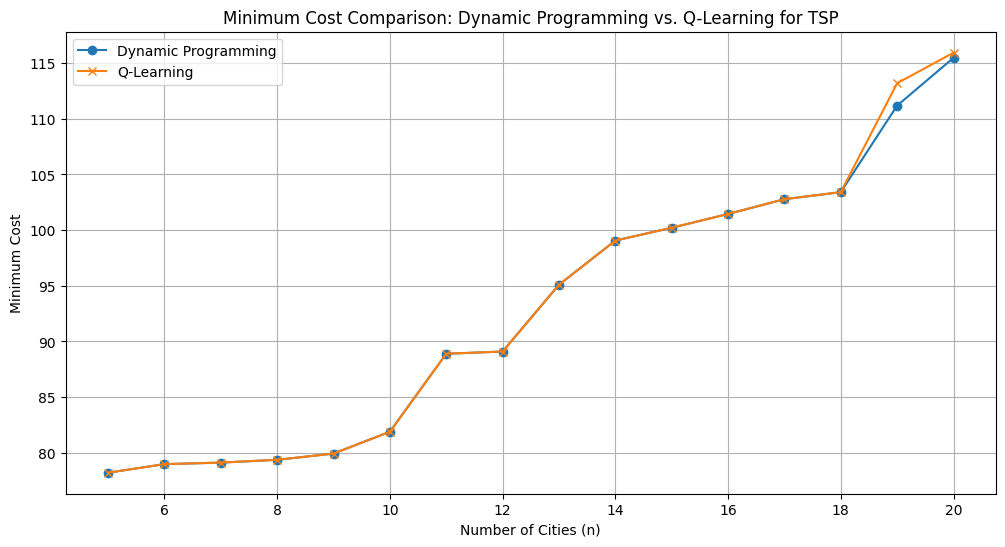

In [ ]:
# Define the range of cities to test
city_counts = list(range(5, 21))  # Adjust the range as needed

# Storage for results
execution_times_q_learning = []
execution_times_dynamic = []
min_costs_q_learning = []
min_costs_dynamic = []

file_path = 'xqf131.tsp'

# Q-Learning parameters
EPOCHS = 500000
LEARNING_RATE = 0.01
GAMMA = 0.99
INITIAL_EPSILON = 0.7  # Initial epsilon value
FINAL_EPSILON = 0.1    # Final epsilon value (higher means more exploration later)
EPSILON_DECAY = 0.0001   # Decay rate for epsilon
MAX_NO_IMPROVE_EPISODES = 10000

for num_cities in city_counts:
    # Parse coordinates and compute distance matrix for the given number of cities
    coordinates = parse_tsp_file(file_path, num_rows=num_cities)
    dist_matrix = compute_distance_matrix(coordinates)

    # Dynamic Programming approach
    start_dynamic = time.time()
    min_cost_dynamic, _ = tsp_dynamic_programming(dist_matrix)
    end_dynamic = time.time()
    execution_time_dynamic = end_dynamic - start_dynamic
    execution_times_dynamic.append(execution_time_dynamic)
    min_costs_dynamic.append(min_cost_dynamic)

    # Q-Learning approach
    Q_table = np.zeros((num_cities, num_cities))
    start_q_learning = time.time()
    Q_table, cache_distance_best, cache_distance_comp = QLearning(
    Q_table,
    dist_matrix,
    initial_epsilon=INITIAL_EPSILON,
    final_epsilon=FINAL_EPSILON,
    epsilon_decay=EPSILON_DECAY,
    gamma=GAMMA,
    lr=LEARNING_RATE,
    epochs=EPOCHS,
    max_no_improve_episodes=MAX_NO_IMPROVE_EPISODES
    )
    end_q_learning = time.time()
    execution_time_q_learning = end_q_learning - start_q_learning
    execution_times_q_learning.append(execution_time_q_learning)
    min_cost_q_learning = compute_value_of_q_table(Q_table, dist_matrix)
    min_costs_q_learning.append(min_cost_q_learning)

    # Print the results
    print(f"Number of cities: {num_cities}")
    print(f"  Dynamic Programming: Execution time: {execution_time_dynamic:.2f} seconds, Minimum cost: {min_cost_dynamic:.2f}")
    print(f"  Q-Learning: Execution time: {execution_time_q_learning:.2f} seconds, Minimum cost: {min_cost_q_learning:.2f}")

# Plotting the comparison of execution times (Time Complexity)
plt.figure(figsize=(12, 6))
plt.plot(city_counts, execution_times_dynamic, marker='o', label='Dynamic Programming')
plt.plot(city_counts, execution_times_q_learning, marker='x', label='Q-Learning')
plt.xlabel('Number of Cities (n)')
plt.ylabel('Execution Time (seconds)')
plt.title('Time Complexity Comparison: Dynamic Programming vs. Q-Learning for TSP')
plt.legend()
plt.grid(True)
plt.show()

# Plotting the comparison of minimum costs
plt.figure(figsize=(12, 6))
plt.plot(city_counts, min_costs_dynamic, marker='o', label='Dynamic Programming')
plt.plot(city_counts, min_costs_q_learning, marker='x', label='Q-Learning')
plt.xlabel('Number of Cities (n)')
plt.ylabel('Minimum Cost')
plt.title('Minimum Cost Comparison: Dynamic Programming vs. Q-Learning for TSP')
plt.legend()
plt.grid(True)
plt.show()

Comparision for Minimum Cost, Time and Space Complexity

Stopping early after 10005 epochs due to no improvement.
Number of cities: 5
  Dynamic Programming: Execution time: 0.00 seconds, Minimum cost: 78.19999999999999, Memory usage: 0.01 MB
  Q-Learning: Execution time: 4.94 seconds, Minimum cost: 78.2, Memory usage: 7.65 MB
Stopping early after 15842 epochs due to no improvement.
Number of cities: 6
  Dynamic Programming: Execution time: 0.00 seconds, Minimum cost: 78.97, Memory usage: 0.01 MB
  Q-Learning: Execution time: 11.20 seconds, Minimum cost: 78.97, Memory usage: 7.65 MB
Stopping early after 15181 epochs due to no improvement.
Number of cities: 7
  Dynamic Programming: Execution time: 0.00 seconds, Minimum cost: 79.11, Memory usage: 0.02 MB
  Q-Learning: Execution time: 12.74 seconds, Minimum cost: 79.11, Memory usage: 7.64 MB
Stopping early after 13364 epochs due to no improvement.
Number of cities: 8
  Dynamic Programming: Execution time: 0.01 seconds, Minimum cost: 79.36, Memory usage: 0.05 MB
  Q-Learning: Execution time: 13.6

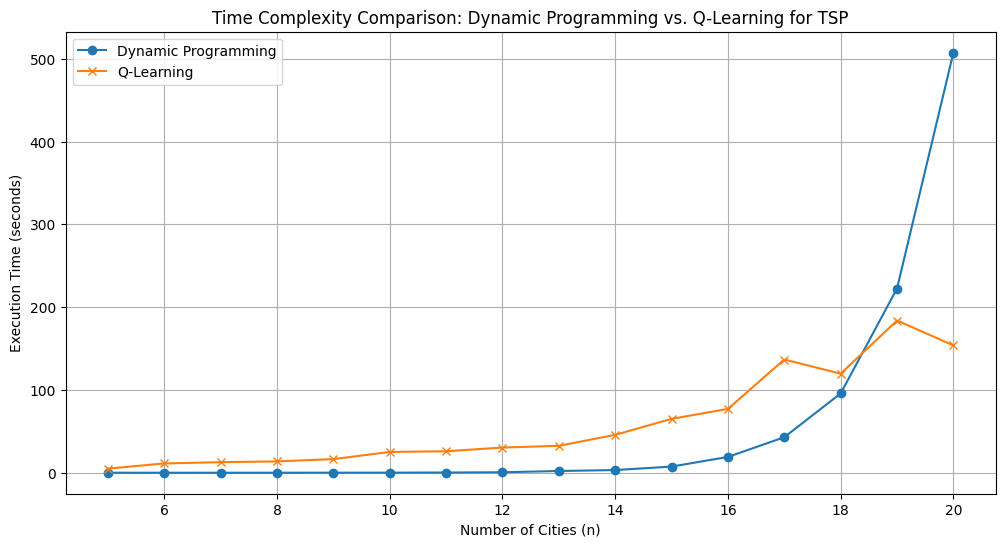

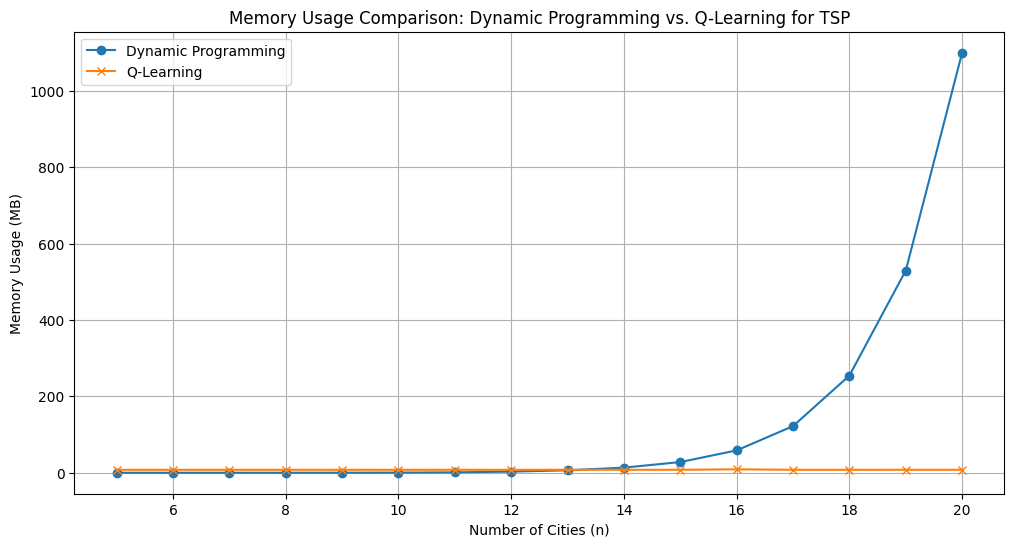

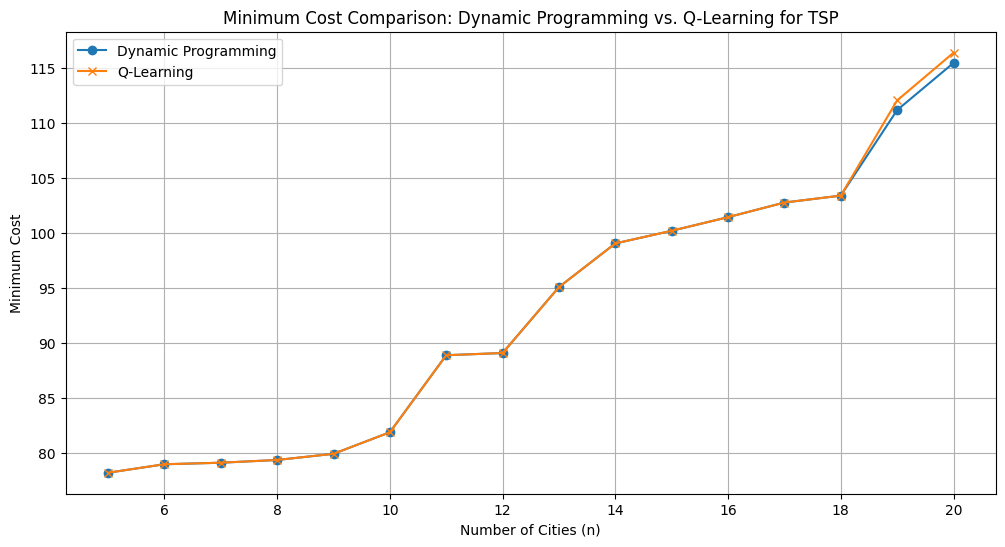

In [ ]:
import time
import numpy as np
import matplotlib.pyplot as plt
import tracemalloc

def measure_memory(func, *args, **kwargs):
    """Measure memory usage of a function using tracemalloc."""
    tracemalloc.start()
    start_snapshot = tracemalloc.take_snapshot()

    # Run the function
    result = func(*args, **kwargs)

    end_snapshot = tracemalloc.take_snapshot()
    tracemalloc.stop()

    # Compute memory usage difference
    top_stats = end_snapshot.compare_to(start_snapshot, 'lineno')
    memory_usage = sum(stat.size for stat in top_stats) / (1024 * 1024)  # Convert bytes to MB
    return memory_usage, result

# Define the range of cities to test
city_counts = list(range(5, 21))  # Adjust the range as needed

# Storage for results
execution_times_q_learning = []
execution_times_dynamic = []
memory_usages_q_learning = []
memory_usages_dynamic = []
min_costs_q_learning = []
min_costs_dynamic = []

file_path = 'xqf131.tsp'

# Q-Learning parameters
EPOCHS = 500000
LEARNING_RATE = 0.01
GAMMA = 0.99
INITIAL_EPSILON = 0.7  # Initial epsilon value
FINAL_EPSILON = 0.1    # Final epsilon value (higher means more exploration later)
EPSILON_DECAY = 0.0001   # Decay rate for epsilon
MAX_NO_IMPROVE_EPISODES = 10000

for num_cities in city_counts:
    # Parse coordinates and compute distance matrix for the given number of cities
    coordinates = parse_tsp_file(file_path, num_rows=num_cities)
    dist_matrix = compute_distance_matrix(coordinates)

    # Dynamic Programming approach
    start_dynamic = time.time()
    memory_usage_dynamic, (min_cost_dynamic, _) = measure_memory(tsp_dynamic_programming, dist_matrix)
    end_dynamic = time.time()
    execution_time_dynamic = end_dynamic - start_dynamic
    execution_times_dynamic.append(execution_time_dynamic)
    min_costs_dynamic.append(min_cost_dynamic)
    memory_usages_dynamic.append(memory_usage_dynamic)

    # Q-Learning approach
    Q_table = np.zeros((num_cities, num_cities))
    start_q_learning = time.time()
    memory_usage_q_learning, (Q_table, _, _) = measure_memory(
        QLearning,
        Q_table,
        dist_matrix,
        initial_epsilon=INITIAL_EPSILON,
        final_epsilon=FINAL_EPSILON,
        epsilon_decay=EPSILON_DECAY,
        gamma=GAMMA,
        lr=LEARNING_RATE,
        epochs=EPOCHS,
        max_no_improve_episodes=MAX_NO_IMPROVE_EPISODES
    )
    end_q_learning = time.time()
    execution_time_q_learning = end_q_learning - start_q_learning
    execution_times_q_learning.append(execution_time_q_learning)
    min_cost_q_learning = compute_value_of_q_table(Q_table, dist_matrix)
    min_costs_q_learning.append(min_cost_q_learning)
    memory_usages_q_learning.append(memory_usage_q_learning)

    # Print the results
    print(f"Number of cities: {num_cities}")
    print(f"  Dynamic Programming: Execution time: {execution_time_dynamic:.2f} seconds, Minimum cost: {min_cost_dynamic}, Memory usage: {memory_usage_dynamic:.2f} MB")
    print(f"  Q-Learning: Execution time: {execution_time_q_learning:.2f} seconds, Minimum cost: {min_cost_q_learning}, Memory usage: {memory_usage_q_learning:.2f} MB")

# Plotting the comparison of execution times (Time Complexity)
plt.figure(figsize=(12, 6))
plt.plot(city_counts, execution_times_dynamic, marker='o', label='Dynamic Programming')
plt.plot(city_counts, execution_times_q_learning, marker='x', label='Q-Learning')
plt.xlabel('Number of Cities (n)')
plt.ylabel('Execution Time (seconds)')
plt.title('Time Complexity Comparison: Dynamic Programming vs. Q-Learning for TSP')
plt.legend()
plt.grid(True)
plt.show()

# Plotting the comparison of memory usage
plt.figure(figsize=(12, 6))
plt.plot(city_counts, memory_usages_dynamic, marker='o', label='Dynamic Programming')
plt.plot(city_counts, memory_usages_q_learning, marker='x', label='Q-Learning')
plt.xlabel('Number of Cities (n)')
plt.ylabel('Memory Usage (MB)')
plt.title('Memory Usage Comparison: Dynamic Programming vs. Q-Learning for TSP')
plt.legend()
plt.grid(True)
plt.show()

# Plotting the comparison of minimum costs
plt.figure(figsize=(12, 6))
plt.plot(city_counts, min_costs_dynamic, marker='o', label='Dynamic Programming')
plt.plot(city_counts, min_costs_q_learning, marker='x', label='Q-Learning')
plt.xlabel('Number of Cities (n)')
plt.ylabel('Minimum Cost')
plt.title('Minimum Cost Comparison: Dynamic Programming vs. Q-Learning for TSP')
plt.legend()
plt.grid(True)
plt.show()
